In [3]:
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [4]:
data = pd.read_csv('http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv', index_col=0)
data.head()

TV  Radio  Newspaper  Sales
1  230.1   37.8       69.2   22.1
2   44.5   39.3       45.1   10.4
3   17.2   45.9       69.3    9.3
4  151.5   41.3       58.5   18.5
5  180.8   10.8       58.4   12.9

Features of data:
    - TV Advertising dollars
    - Radio advertising dollars
    - Newspaper advertising dollars
    
Response Variable:
    - Sales of product

In [5]:
data.shape

(200, 4)

200 observations of 4 variables

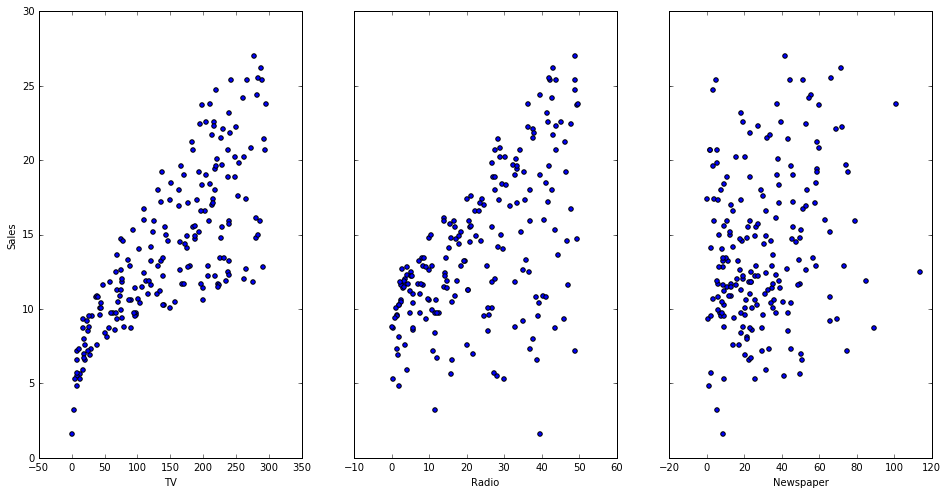

In [6]:
fig, axs = plt.subplots(1, 3, sharey = True)
data.plot(kind='scatter', x = 'TV', y = 'Sales', ax = axs[0], figsize = (16, 8))
data.plot(kind='scatter', x = 'Radio', y = 'Sales', ax = axs[1])
data.plot(kind='scatter', x = 'Newspaper', y = 'Sales', ax = axs[2])

In [8]:
# this is the standard import if you're using "formula notation" (similar to R)
import statsmodels.formula.api as smf

# create a fitted model in one line
lm = smf.ols(formula='Sales ~ TV', data=data).fit()

# print the coefficients
lm.params

Intercept    7.032594
TV           0.047537
dtype: float64

In [10]:
# create a DataFrame with the minimum and maximum values of TV
X_new = pd.DataFrame({'TV': [data.TV.min(), data.TV.max()]})
X_new.head()

TV
0    0.7
1  296.4

In [11]:
# make predictions for those x values and store them
preds = lm.predict(X_new)
preds

array([  7.0658692 ,  21.12245377])

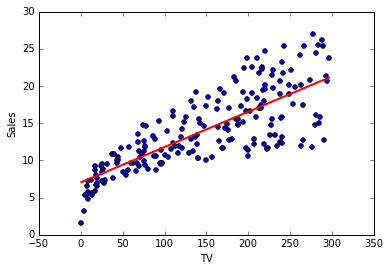

In [12]:
# first, plot the observed data
data.plot(kind='scatter', x='TV', y='Sales')

# then, plot the least squares line
plt.plot(X_new, preds, c='red', linewidth=2)
